In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, softmax

%matplotlib widget
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [15]:
df = pd.read_csv("archive/song_data.csv")

df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [16]:
df.shape

(18835, 15)

In [17]:
missing_popularity = df['song_popularity'].isnull().any()

missing_popularity

False

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [19]:
# Define the bin edges and labels
bin_edges = [0, 20, 40, 60, 80, 100]
bin_labels = [0, 1, 2, 3, 4]# ['Trash', 'Flop', 'Average', 'Hit', 'Monsterhit']

# Create a new column 'popularity_label' based on the bins
df['song_popularity'] = pd.cut(df['song_popularity'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['track_popularity_label'] = df['song_popularity'].astype(int)

In [21]:
df = df.drop(['song_popularity'],axis=1)

In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   song_name               18835 non-null  object 
 1   song_duration_ms        18835 non-null  int64  
 2   acousticness            18835 non-null  float64
 3   danceability            18835 non-null  float64
 4   energy                  18835 non-null  float64
 5   instrumentalness        18835 non-null  float64
 6   key                     18835 non-null  int64  
 7   liveness                18835 non-null  float64
 8   loudness                18835 non-null  float64
 9   audio_mode              18835 non-null  int64  
 10  speechiness             18835 non-null  float64
 11  tempo                   18835 non-null  float64
 12  time_signature          18835 non-null  int64  
 13  audio_valence           18835 non-null  float64
 14  track_popularity_label  18835 non-null

In [29]:
X, y = df.drop('song_name',axis=1).to_numpy(), df['track_popularity_label'].to_numpy()

In [30]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (18835, 14)
The shape of y is: (18835,)


In [31]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [
        ### START CODE HERE ###

        tf.keras.Input(shape=(14,)),    #specify input shape
        Dense(20, activation=relu, name="L1"),
        Dense(10, activation=relu, name="L2"),
        Dense(5, activation=linear, name="L3"),
        
        ### END CODE HERE ###
    ], name = "my_model"
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [32]:
[layer1, layer2, layer3] = model.layers

In [33]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (14, 20), b1 shape = (20,)
W2 shape = (20, 10), b2 shape = (10,)
W3 shape = (10, 5), b3 shape = (5,)


In [34]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40


589/589 [==============================] - 2s 2ms/step - loss: 4426.9507
Epoch 2/40
589/589 [==============================] - 1s 2ms/step - loss: 1.5204
Epoch 3/40
589/589 [==============================] - 1s 2ms/step - loss: 1.4844
Epoch 4/40
589/589 [==============================] - 3s 5ms/step - loss: 1.4664
Epoch 5/40
589/589 [==============================] - 2s 3ms/step - loss: 1.4586
Epoch 6/40
589/589 [==============================] - 2s 3ms/step - loss: 1.4556
Epoch 7/40
589/589 [==============================] - 1s 2ms/step - loss: 1.4546
Epoch 8/40
589/589 [==============================] - 2s 4ms/step - loss: 1.4542
Epoch 9/40
589/589 [==============================] - 1s 2ms/step - loss: 1.4540
Epoch 10/40
589/589 [==============================] - 1s 1ms/step - loss: 1.4540
Epoch 11/40
589/589 [==============================] - 1s 1ms/step - loss: 1.4540
Epoch 12/40
589/589 [==============================] - 1s 1ms/step - loss: 1.4540
Epoch 13/40
589/589 [============

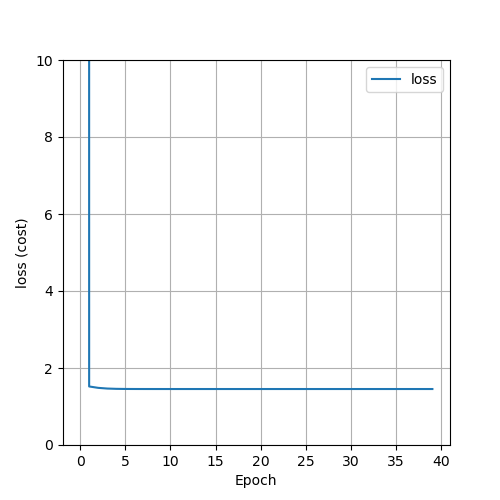

In [35]:
fig,ax = plt.subplots(1,1, figsize = (5,5))
ax.plot(history.history['loss'], label='loss')
ax.set_ylim([0, 10])
ax.set_xlabel('Epoch')
ax.set_ylabel('loss (cost)')
ax.legend()
ax.grid(True)
plt.show()

In [44]:
df.loc[df['track_popularity_label'].idxmin()]

song_name                 No One Knows
song_duration_ms                255066
acousticness                    0.0137
danceability                     0.518
energy                           0.538
instrumentalness              0.000398
key                                  0
liveness                         0.141
loudness                        -5.818
audio_mode                           1
speechiness                     0.0486
tempo                          170.953
time_signature                       4
audio_valence                    0.687
track_popularity_label               0
Name: 22, dtype: object

In [45]:
Ed_IHE_Remix = X[22]
print(Ed_IHE_Remix.shape)
prediction = model.predict(Ed_IHE_Remix.reshape(1,14))
print(f" predicting a Two: \n{prediction}")  # Moet toch zijn: predicting a Four?
print(f" Largest Prediction index: {np.argmax(prediction)}")

(14,)
1/1 [==============================] - 0s 32ms/step


 predicting a Two: 
[[-0.5858788  -0.14442287  0.66784763  0.60449785 -0.75226223]]
 Largest Prediction index: 2


In [46]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}") # Moet toch zijn: predicting a Four?
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

 predicting a Two. Probability vector: 
[[0.09810285 0.15254693 0.34369093 0.32259348 0.08306579]]
np.argmax(prediction_p): 2
